In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


Hello! This is a test datast from the wonderful people at IBM. It is my first solo project here on Kaggle that is completed. The dataset is trying to determine some of the causes of attrition among employees or what could cause them to leave. Let's dive in.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Bringing in all of our necessary packages!

In [3]:
data = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Reading in our data and taking our first look at it.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Looking at the types for each column.

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Quick stats for the columns where it applies.

In [6]:
#Checking for NA's in the data.
missing_data = data.isnull().sum()
missing_data

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Making sure they are no null or NA values.

Beginning the EDA. I want to see if there are any obvious patterns that could tell me if an employee would leave or not.

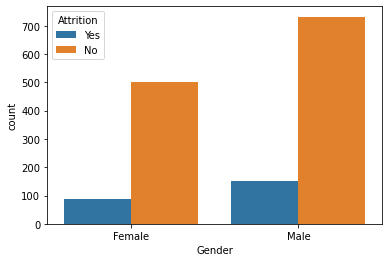

In [7]:
sns.countplot('Gender', hue='Attrition', data=data)

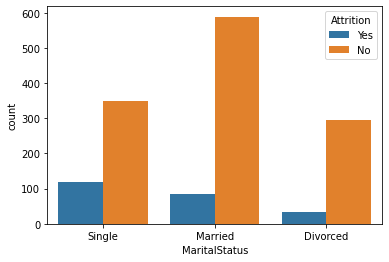

In [8]:
sns.countplot('MaritalStatus', hue='Attrition', data=data)

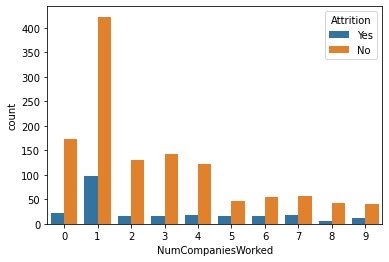

In [9]:
sns.countplot('NumCompaniesWorked', hue='Attrition', data=data)

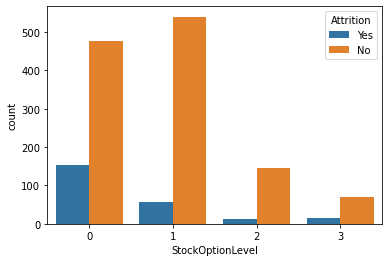

In [10]:
sns.countplot('StockOptionLevel', hue='Attrition', data=data)

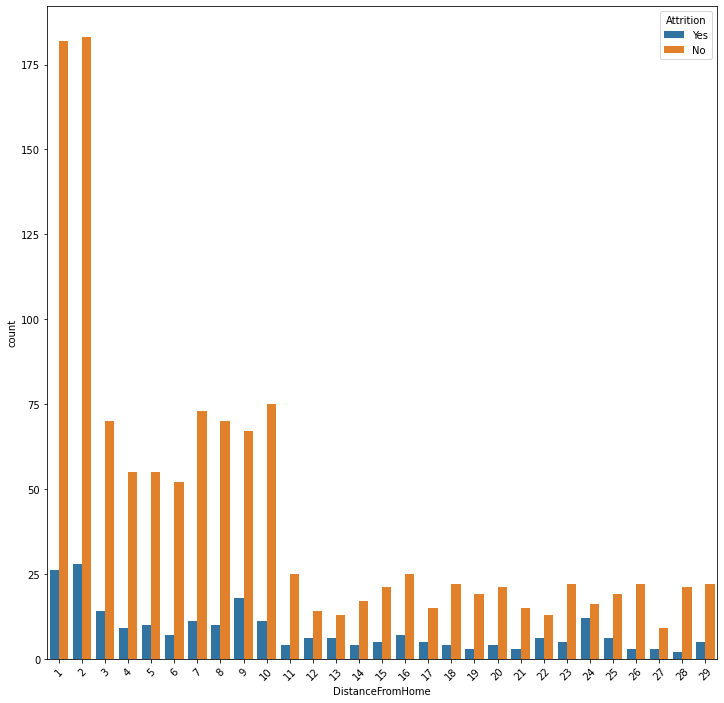

In [11]:
plt.figure(figsize=(12,12))
sns.countplot('DistanceFromHome', hue='Attrition', data=data)
plt.xticks(rotation=45)
plt.show()

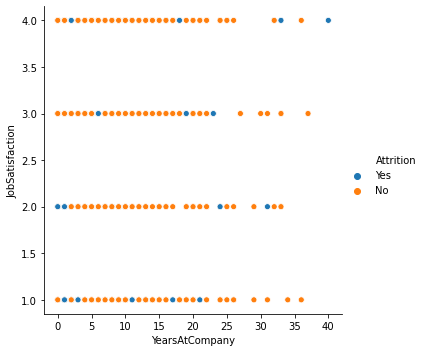

In [12]:
#Checking variables that could be important

sns.relplot(x= "YearsAtCompany", y= "JobSatisfaction", hue = "Attrition", data = data)

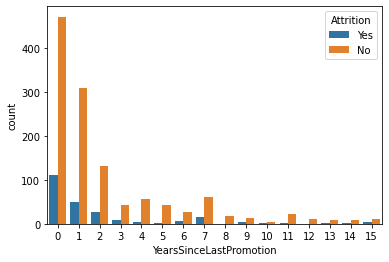

In [13]:
#Continuing comparing variables I think are important
sns.countplot(x= "YearsSinceLastPromotion",  hue = "Attrition",data = data)

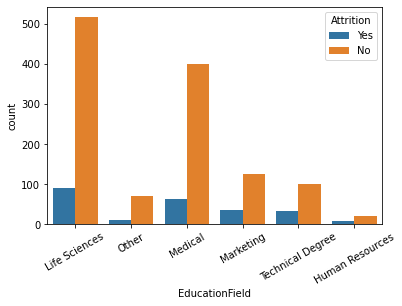

In [14]:
sns.countplot('EducationField', hue='Attrition', data=data)
plt.xticks(rotation=30)
plt.show()

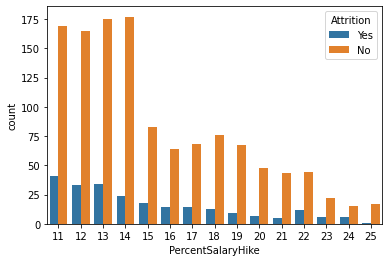

In [15]:
sns.countplot('PercentSalaryHike', hue='Attrition', data=data)

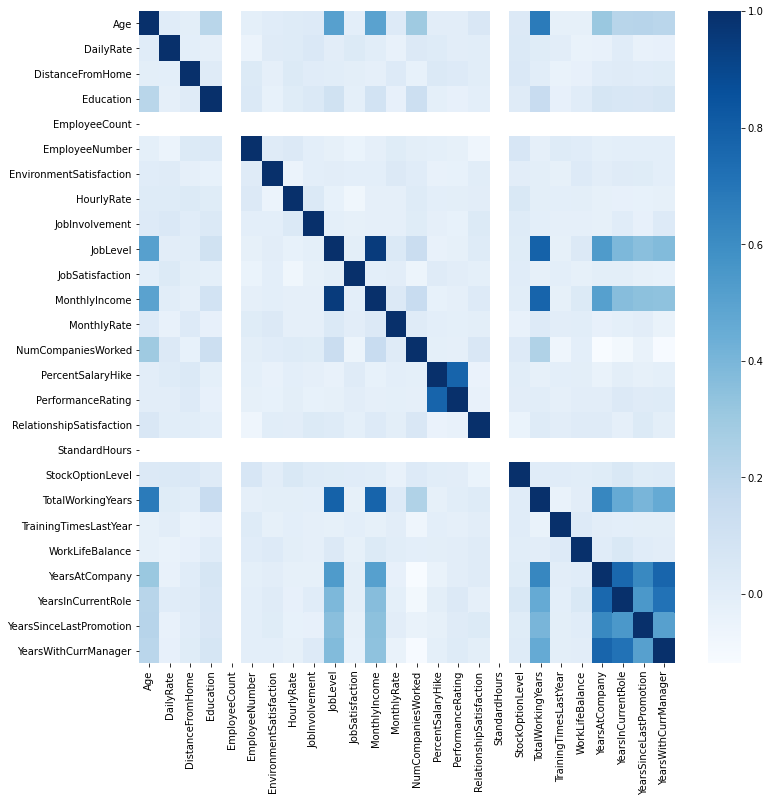

In [16]:
#Checking for collinearity by using a correlation matrix.

correlation_heatmap = data.drop(['Attrition'], axis=1).corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_heatmap,cmap='Blues')
plt.show()

In [17]:
#Looking at the ratio 
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

I want to see how the target, in this case Attrition is split. It looks like we have a lot more people who are not leaving which is good for this made up company but we could run into the problem of bias in the data.

In [18]:
data.Attrition.replace({'Yes': 1, 'No': 0}, inplace=True)
data.BusinessTravel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently':2}, inplace=True)
data.Department.replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2, }, inplace=True)
data.Gender.replace({'Female': 0, 'Male': 1}, inplace=True)
data.OverTime.replace({'No': 0, 'Yes':1}, inplace=True)
data.EducationField.replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 
                             'Technical Degree': 3, 'Human Resources': 4, 'Other':5}, 
                            inplace=True)
data.JobRole.replace({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2,
                     'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5,
                     'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}, inplace=True)
data.MaritalStatus.replace({'Single': 0, 'Married': 1, 'Divorced': 2}, inplace=True)

In [19]:
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'HourlyRate',
           'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
           'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
           'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
           'YearsatCompany', 'YearsinCurrentRole', 'YearsSinceLastPromotion', 'YearswithCurrManager']
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'HourlyRate',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'YearsatCompany',
 'YearsinCurrentRole',
 'YearsSinceLastPromotion',
 'YearswithCurrManager']

In [20]:
cat_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
           'JobRole', 'MartialStatus', 'OverTime']
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MartialStatus',
 'OverTime']

I want to organize the columns to see if which are categorical against which are numeric. I changed some of the numeric to categorical to make it easy for our model.

In [21]:
df1 = data.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
df2 = pd.get_dummies(df1)
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,0,1,2,0,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,2,279,1,8,1,0,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,5,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,2,1392,1,3,4,0,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,1,1,1,...,3,4,1,6,3,3,2,2,2,2


In [22]:
X = df2.drop(columns=['Attrition'])
y = df2['Attrition'] 

After our data has been changed to my satisfaction, I am splitting the data one last time into what will become our test and train sets. The X is all of the variables that I want to use to see how they affect attrition rate within the company. The y is the dependent variable I want to observe from the model.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=137)

Splitting into testing and training. Random state for the sake of reproducibility.

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print("Accurary Score: {}".format(accuracy_score(y_test, rf_predictions)))


Accurary Score: 0.8458049886621315


The accuracy score! Not bad for the model.

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

GBCmodel = GradientBoostingClassifier(n_estimators = 50, max_depth = 4, random_state=137)

GBCmodel.fit(X_train, y_train)
print('GBCmodel Training Score is : ', GBCmodel.score(X_train, y_train))
print('GBCmodel Test Score is : ', GBCmodel.score(X_test, y_test))

y_pred = GBCmodel.predict(X_test)

GBCmodel Training Score is :  0.9650145772594753
GBCmodel Test Score is :  0.854875283446712


Using GradientBoosting, which is commonly used in decision trees and by extension, randomforests.

Confusion Matrix is : 
 [[358  12]
 [ 52  19]]


/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:277: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  cmap=self.cmap, **kws)


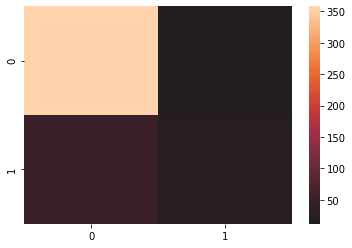

In [26]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

sns.heatmap(CM, center=True, color = 'rgb')
plt.show()

Checking our confusion matrix. As we can see, our model successfully classified people who did not leave the company.

In [27]:
rf.feature_importances_

array([0.06696627, 0.01681631, 0.05183008, 0.01314631, 0.04869796,
       0.01988242, 0.02385089, 0.02527471, 0.00843151, 0.0464902 ,
       0.02638689, 0.02291044, 0.02782616, 0.02755028, 0.02487585,
       0.09206085, 0.05414373, 0.03188109, 0.05547365, 0.03233362,
       0.00511625, 0.02244573, 0.03284208, 0.04806936, 0.025908  ,
       0.02689185, 0.03956011, 0.0261609 , 0.02278515, 0.03339138])

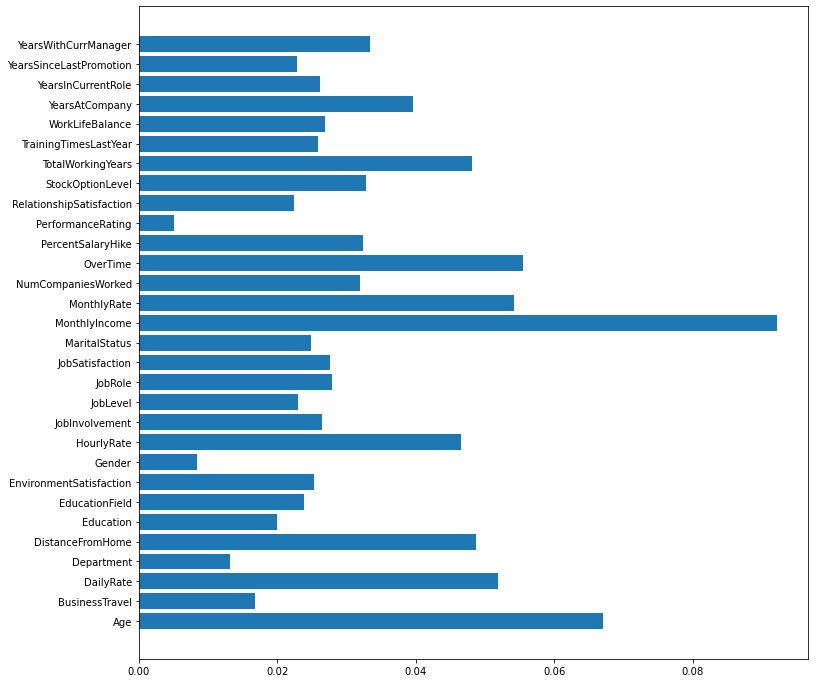

In [28]:
from sklearn.inspection import permutation_importance

col_name = list(X.columns)

plt.figure(figsize=(12,12))
plt.barh(col_name, rf.feature_importances_)
plt.show()

Looking at feature importance. This can help identify in the future what might cause a person to leave the company.